# Imports and statics

In [53]:
dir(list)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

In [37]:
import numpy as np
from datetime import datetime 
import urllib
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision
from torchvision import datasets, transforms

import matplotlib.pyplot as plt

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
RANDOM_SEED = 98678
LEARNING_RATE = 0.001                                      # why?
BATCH_SIZE = 32                                            # why?
N_EPOCHS = 15                                              # why?
IMG_SIZE = 32
N_CLASSES = 10

torch.manual_seed(RANDOM_SEED)


# Train and validation boilerplate code

In [38]:

def train(train_loader, model, criterion, optimizer, device):

    model.train()
    running_loss = 0
    
    for X, y_true in train_loader:
        optimizer.zero_grad()
        
        X = X.to(device) # or .cuda()
        y_true = y_true.to(device)
    
        # Forward pass

        y_hat = model(X)  # forward method
        loss = criterion(y_hat, y_true) 
        running_loss += loss.item() * X.size(0)

        # Backward pass
        loss.backward()
        optimizer.step()
        print("Works")
        
    epoch_loss = running_loss / len(train_loader.dataset)
    return model, optimizer, epoch_loss

def validate(valid_loader, model, criterion, device):
 
    model.eval()
    running_loss = 0
    
    for X, y_true in valid_loader:
    
        X = X.to(device)
        y_true = y_true.to(device)

        y_hat= model(X) 
        loss = criterion(y_hat, y_true) 
        running_loss += loss.item() * X.size(0)

    epoch_loss = running_loss / len(valid_loader.dataset)
        
    return model, epoch_loss

# Training loop

In [54]:

def training_loop(model, criterion, optimizer, train_loader, valid_loader, epochs, device, print_every=1):
 
    
    best_loss = 1e10 #float("inf")
    train_losses = []
    valid_losses = []
 
    for epoch in range(epochs):

        model, optimizer, train_loss = train(train_loader, model, criterion, optimizer, device)
        train_losses.append(train_loss)
        
       # model.eval() batchnorm or dropout layers disabled
       # torch.no_grad() deactivates autograd and speeds up computation 
        
        with torch.no_grad():
            model, valid_loss = validate(valid_loader, model, criterion, device)
            valid_losses.append(valid_loss)

        if epoch % print_every == (print_every - 1):
            

            print(f'{datetime.now().time().replace(microsecond=0)} --- '
                  f'Epoch: {epoch}\t'
                  f'Train loss: {train_loss:.4f}\t'
                  f'Valid loss: {valid_loss:.4f}\t'
              )

    return model, optimizer, (train_losses, valid_losses)


# Data Pre-proc

In [40]:
transforms = transforms.Compose([transforms.Resize((32, 32)),
                                 transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,))])  #############*************************   STANDARDIZATION *************************#######################



train_dataset = datasets.MNIST(root='mnist_data', 
                               train=True, 
                               transform=transforms,
                               download=False)

valid_dataset = datasets.MNIST(root='mnist_data', 
                               train=False, 
                               transform=transforms)

train_loader = DataLoader(dataset=train_dataset, 
                          batch_size=BATCH_SIZE, 
                          shuffle=True)

valid_loader = DataLoader(dataset=valid_dataset, 
                          batch_size=BATCH_SIZE, 
                          shuffle=False)


# Network Definition (What is sequential?)

In [41]:
class LeNet5(nn.Module):

    def __init__(self, n_classes):
        super(LeNet5, self).__init__()
        
       
        
        self.feature_extractor = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1),
            nn.BatchNorm2d(6),                        #######################***************  BATCH NORM  ****************#################
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2),
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1),
            nn.BatchNorm2d(16),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2),
            nn.Conv2d(in_channels=16, out_channels=120, kernel_size=5, stride=1),
            nn.BatchNorm2d(120),
            nn.Tanh()
        )

        self.classifier = nn.Sequential(
            nn.Linear(in_features=120, out_features=84),
            nn.BatchNorm1d(84),
            nn.Tanh(),
            nn.Linear(in_features=84, out_features=n_classes),
        )


    def forward(self, x):
        x = self.feature_extractor(x)
        x = torch.flatten(x, 1)

        logits = self.classifier(x)

        probs = F.softmax(logits, dim=1)

        return probs


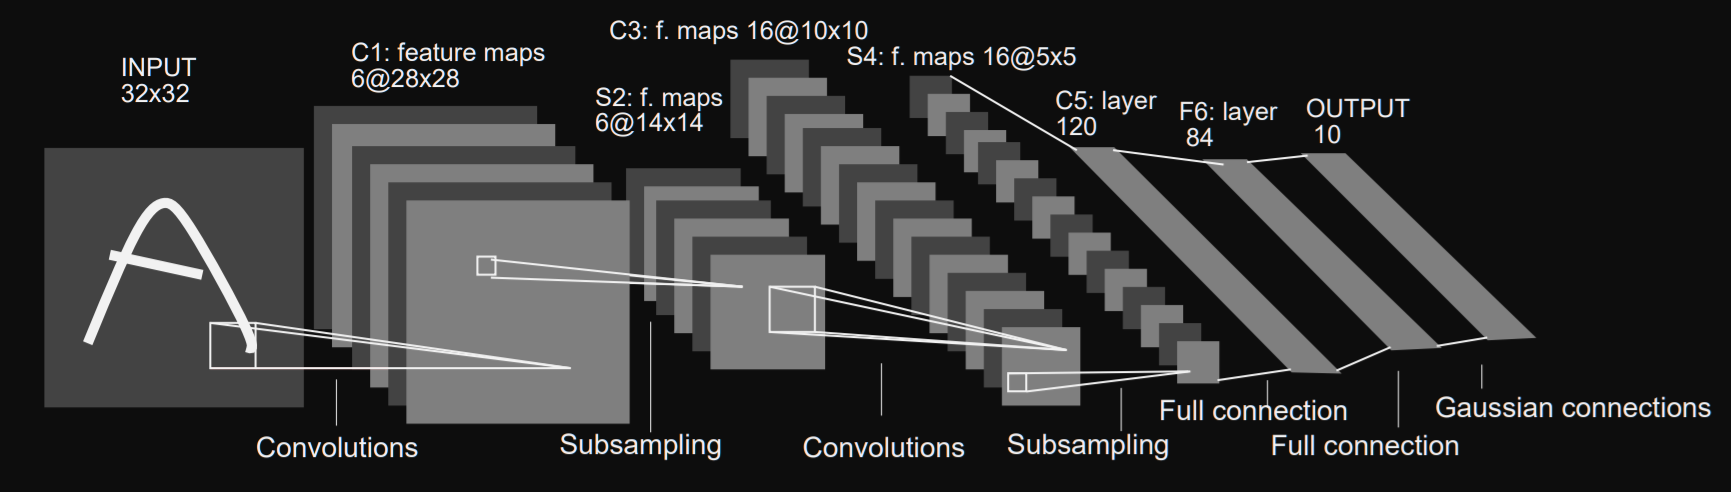

# Instantiation

In [42]:
model = LeNet5(N_CLASSES).to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE) # Discuss at the end of the pipeline
criterion = nn.CrossEntropyLoss()

# MSE =  $\frac{1}{N}\sum_{i=1}^{N} (y_{i}- \hat{y}_{i})^2$

# MSE is straightforward, Lets look at [CrossEntropy](https://towardsdatascience.com/cross-entropy-for-dummies-5189303c7735)

# Training LeNet on mnist

In [55]:
model, optimizer, _ = training_loop(model, criterion, optimizer, train_loader, valid_loader, N_EPOCHS, DEVICE)

Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Work

KeyboardInterrupt: 

# Can we switch resnet instead of LeNet in this pipeline?

In [56]:
resnet = torchvision.models.resnet18(pretrained=False)
resnet.cuda()
model, optimizer, _ = training_loop(resnet, criterion, optimizer, train_loader, valid_loader, N_EPOCHS, DEVICE)

RuntimeError: Given groups=1, weight of size [64, 3, 7, 7], expected input[32, 1, 32, 32] to have 3 channels, but got 1 channels instead

# Lets take a look at the model

In [45]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

# Fixing the shape mismatch

In [57]:
resnet = torchvision.models.resnet18(pretrained=False)
resnet.conv1 = torch.nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
resnet.cuda()
model, optimizer, _ = training_loop(resnet, criterion, optimizer, train_loader, valid_loader, N_EPOCHS, DEVICE)


Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works
Works


KeyboardInterrupt: 

# Modifying network architectures

## Adding layers

In [58]:
class resnet_mod(nn.Module):

    def __init__(self):
        super(resnet_mod, self).__init__()
        
        self.resnet = torchvision.models.resnet18(pretrained=False)
        self.resnet.conv1 = torch.nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        self.extra_op = torch.nn.Linear(1000,1000)

    def forward(self, x):
        x = self.resnet(x)
        x = self.extra_op(x)
        return x

In [59]:
resnet = resnet_mod()
resnet.cuda()

resnet_mod(
  (resnet): ResNet(
    (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_r

# Iterate over layers

In [49]:
resnet = torchvision.models.resnet18(pretrained=False)
for idx, i in enumerate(list(resnet.children())):
        print(i, "ends here ****")

Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False) ends here ****
BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True) ends here ****
ReLU(inplace=True) ends here ****
MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False) ends here ****
Sequential(
  (0): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (1): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(64, 64,

# Removing layers is easy if it's your own custom network class; work around for pre-trained model (Usually do not alter intermediate layers in pretrained models.)

In [62]:
class garbage_network(nn.Module):

    def __init__(self):
        super(garbage_network, self).__init__()
        
#         self.feature_extractor = nn.Sequential(*list(resnet.children())[:-5]
#         )
        
#         OR
        layers = []
        for idx, i in enumerate(list(resnet.children())):
            if(idx <7):
                layers.append(i)
        self.feature_extractor = nn.Sequential(*layers)

    def forward(self, x):
        x = self.feature_extractor(x)
       

        return x

garbage = garbage_network()
print(garbage)

garbage_network(
  (feature_extractor): Sequential(
    (0): ResNet(
      (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (1): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (

# If you want to modify a certain intermediate layer, iterate over the model with checks and when you reach the target layer, add/modify the layer and append to your "list of layers"

# Learning rates - How do we decide where to start?  (show LRfinder graph) 1e-3 to 1e-4 usually ok for our usecases
## Should it be static?
## LR decay?
## Cyclic Learning Rate policy?
## [Cyclic Learning Rate](https://arxiv.org/pdf/1506.01186.pdf)
## Babysitting is always an option.

# Optimizers - SGD vs Adam
## single Lr for all params vs adaptive lr for all params
### We are not going deeper into which optimizer is best or if clr with adam is better is that even if a certain optimizer works for a dataset (not even a task) it might not work as well for another dataset, not to mention that there are quite a few hyperparameters in the optimizers themselves, which brings in questions like "is optimizer X better than Y or is Optimizer X with P hyperparams better than Optimizer Y with Q hyperparams". Pragmatically, you usually pick an optimizer that’s been tested on whatever task you are trying to solve and focus either on the architecture, experiments or data. (unless you are directly working on optimization.) 

### Because of the flexibility Adam offers, it often converges much faster than just SGD but if you take a closer look at the Imagenet leaderboards, you'll see quite a few using SGD with momentum(moving avg of gradients instead of gradients themselves) along with LR schedulers.
### "We empirically show that in tasks on which Adam outperforms SGD (BERT pretraining), the noise in stochastic gradients is heavy-tailed. On the other hand, on tasks where traditionally SGD outperforms Adam (ImageNet training), we show that the noise is well concentrated." [Adam vs SGD](https://openreview.net/pdf?id=SJx37TEtDH)
### We will be giving you directions on what optimizer to use.

# Follow this [article](https://www.pyimagesearch.com/2019/07/29/cyclical-learning-rates-with-keras-and-deep-learning/) for a better understanding on the papers referenced in the Cyclic learning rate finder block and auto LR finder.